EDA and Machine Learning of Covid-19 Dataset.

                    01.EDA

In [152]:
import pandas as pd
import numpy as np
import os    
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,roc_auc_score,f1_score, precision_score, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [34]:
covid_data=pd.read_csv("Covid Dataset.csv")
df=pd.DataFrame(covid_data)

In [35]:
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [36]:
np.random.seed(42)
plt.style.use('ggplot')

In [37]:
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [41]:
 # Encoding binary (Yes/No) features and target
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
    

In [42]:
df.head(4)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1


In [43]:
# Basic information about the dataset
print("Dtaset shape: ",df.shape)
print("Columns: ",df.columns)
print("Data types: ",df.dtypes)

Dtaset shape:  (5434, 21)
Columns:  Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')
Data types:  Breathing Problem                          int64
Fever                                      int64
Dry Cough                                  int64
Sore throat                                int64
Running Nose                               int64
Asthma                                     int64
Chronic Lung Disease                       int64
Headache                                   int64
Heart Disease                              int64
Diabetes                       

In [44]:
# checking missing values
print("Missing values: ",df.isnull().sum())

Missing values:  Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


In [51]:
print("summary statistics:",df.describe())

summary statistics:        Breathing Problem        Fever    Dry Cough  Sore throat  Running Nose  \
count        5434.000000  5434.000000  5434.000000  5434.000000   5434.000000   
mean            0.666176     0.786345     0.792602     0.727457      0.543246   
std             0.471621     0.409924     0.405480     0.445309      0.498172   
min             0.000000     0.000000     0.000000     0.000000      0.000000   
25%             0.000000     1.000000     1.000000     0.000000      0.000000   
50%             1.000000     1.000000     1.000000     1.000000      1.000000   
75%             1.000000     1.000000     1.000000     1.000000      1.000000   
max             1.000000     1.000000     1.000000     1.000000      1.000000   

            Asthma  Chronic Lung Disease     Headache  Heart Disease  \
count  5434.000000           5434.000000  5434.000000    5434.000000   
mean      0.462643              0.472028     0.503497       0.464299   
std       0.498648              0.

In [52]:
# targey Distribution
print("\nCOVID-19 Target Distribution:")
print(df['COVID-19'].value_counts(normalize=True))


COVID-19 Target Distribution:
COVID-19
1    0.806588
0    0.193412
Name: proportion, dtype: float64


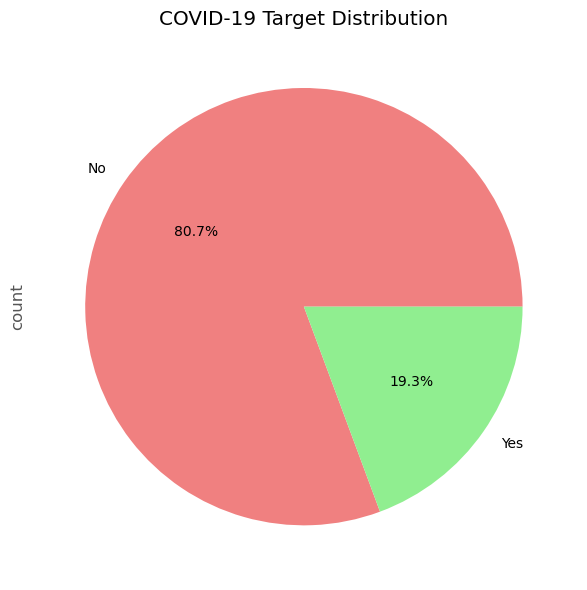

In [78]:
plt.figure(figsize=(6, 6))
df['COVID-19'].value_counts().plot.pie(labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('COVID-19 Target Distribution')
plt.tight_layout()
plt.savefig('covid_target_distribution.png')
plt.show()

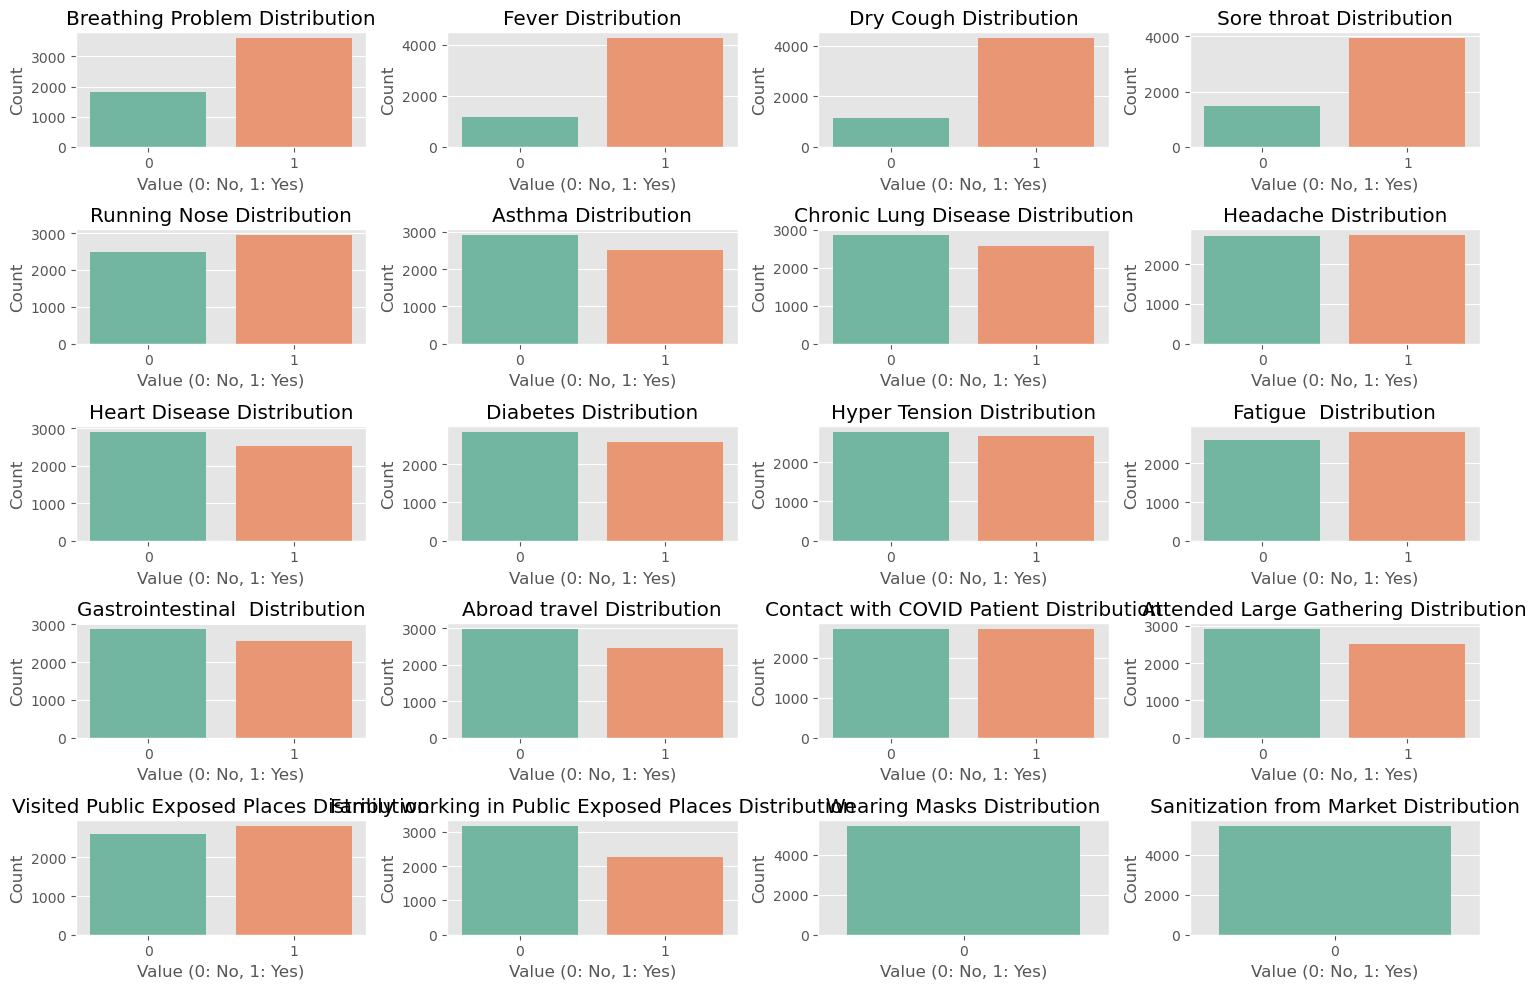

In [86]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude target
    plt.subplot(5, 4, i)
    sns.countplot(x=column, data=df,palette='Set2')
    plt.title(f'{column} Distribution')
    plt.xlabel('Value (0: No, 1: Yes)')
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

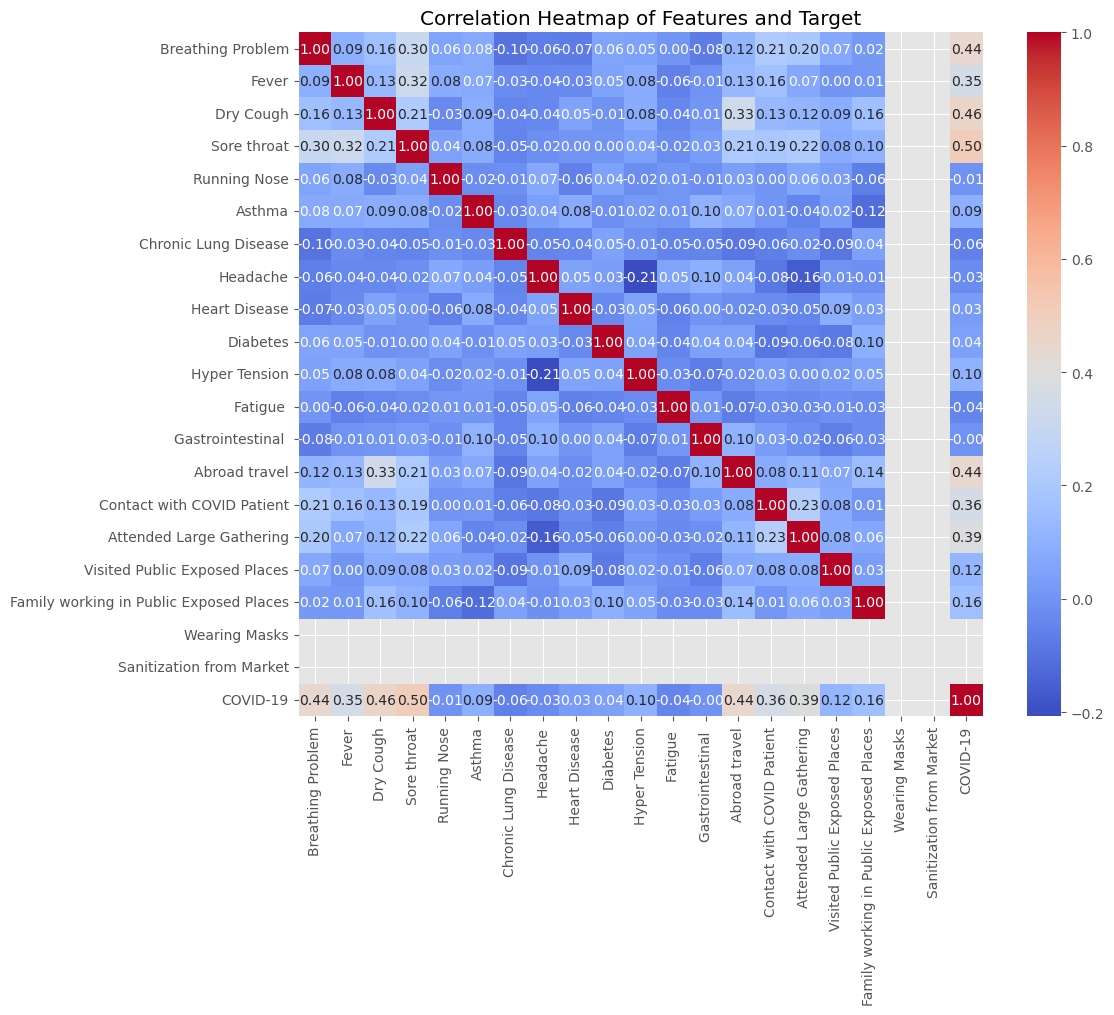

In [90]:
# correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap="coolwarm",square=True)
plt.title("Correlation Heatmap of Features and Target")
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

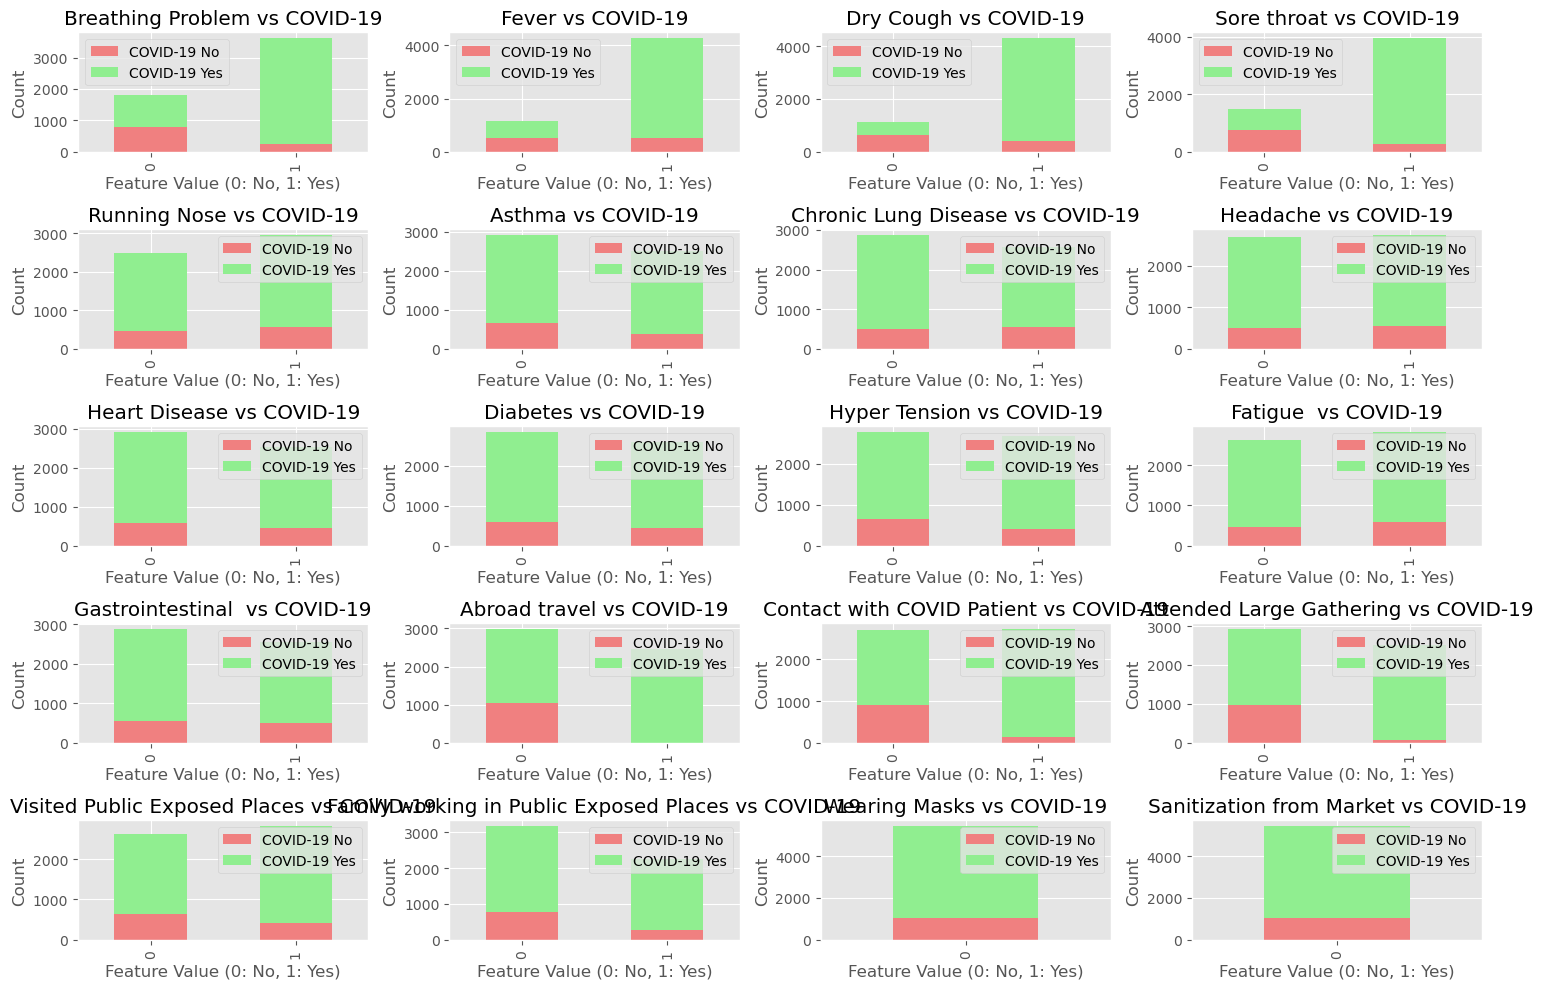

In [93]:
# Feature-Target Relationships (Stacked Bar Plots)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude target
    plt.subplot(5, 4, i)
    pd.crosstab(df[column], df['COVID-19']).plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'lightgreen'])
    plt.title(f'{column} vs COVID-19')
    plt.xlabel('Feature Value (0: No, 1: Yes)')
    plt.ylabel('Count')
    plt.legend(['COVID-19 No', 'COVID-19 Yes'])
plt.tight_layout()
plt.savefig('feature_target_relationships.png')
plt.show()

In [95]:
    # Feature Correlations with Target
    correlations = df.corr()['COVID-19'].sort_values(ascending=False)
    print("\nFeature Correlations with COVID-19:\n", correlations)


Feature Correlations with COVID-19:
 COVID-19                                   1.000000
Sore throat                                0.502848
Dry Cough                                  0.464292
Abroad travel                              0.443875
Breathing Problem                          0.443764
Attended Large Gathering                   0.390145
Contact with COVID Patient                 0.357122
Fever                                      0.352891
Family working in Public Exposed Places    0.160208
Visited Public Exposed Places              0.119755
Hyper Tension                              0.102575
Asthma                                     0.089930
Diabetes                                   0.040627
Heart Disease                              0.027072
Gastrointestinal                          -0.003367
Running Nose                              -0.005657
Headache                                  -0.027793
Fatigue                                   -0.044188
Chronic Lung Disease      

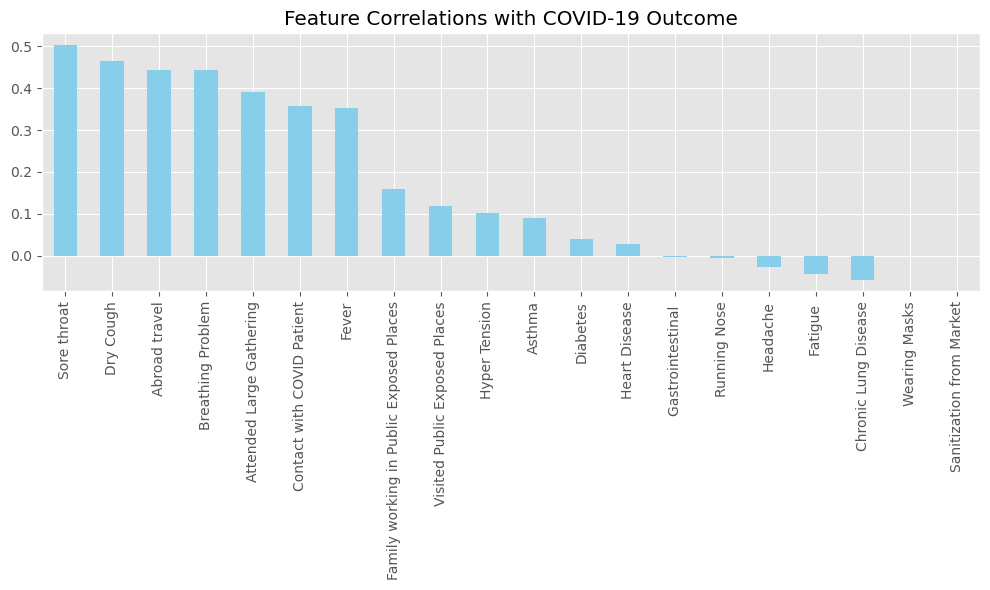

In [96]:
# Visualizing Feature Correlations with Target
plt.figure(figsize=(10, 6))
correlations.drop('COVID-19').plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with COVID-19 Outcome')
plt.tight_layout()
plt.savefig('feature_correlations_target.png')
plt.show()

Machine Learning Model

In [98]:
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [138]:
# Separating features and target
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
print(y.shape)
print(X.shape)
print(df.shape)
    
   

(5434,)
(5434, 20)
(5434, 21)


In [160]:
# splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [161]:
# --- Basic Model: Logistic Regression ---
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, y_pred)
   


[1 0 1 ... 1 1 1] Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       884

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



In [162]:
# --- Intermediate Model: Decision Tree with Pruning ---

dt_model=DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=42)
dt_model.fit(X_train,y_train)
dt_pred=dt_model.predict(X_test)
evaluate_model("Decision tree",y_test,dt_pred)


[1 0 1 ... 1 1 1] Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       884

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



In [164]:
# --- Advanced Model: Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest")


Random Forest Performance:
Accuracy: 0.984360625574977
Precision: 0.9942987457240593
Recall: 0.9864253393665159
F1-Score: 0.9903463940942646
ROC-AUC: 0.9808973987472973

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087



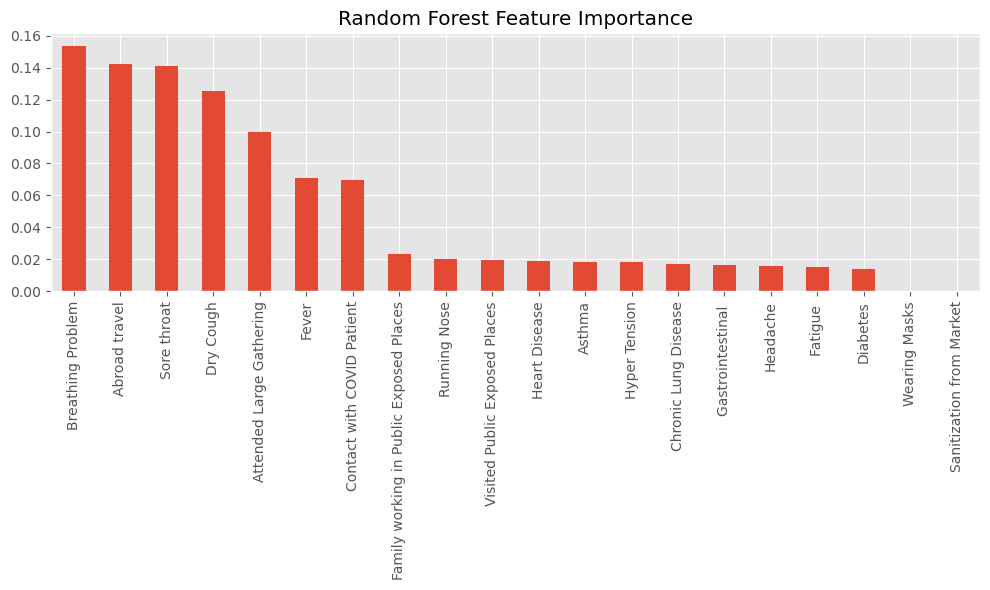

In [165]:
# Visualizing Random Forest feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

In [171]:
# --- Advanced Model: XGBoost with Hyperparameter Tuning ---
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [173]:
# Best model from grid search
best_xgb = grid_search.best_estimator_
xgb_pred = best_xgb.predict(X_test)
evaluate_model(y_test, xgb_pred, "XGBoost (Tuned)")
print("Best XGBoost Parameters:", grid_search.best_params_)


XGBoost (Tuned) Performance:
Accuracy: 0.984360625574977
Precision: 0.9942987457240593
Recall: 0.9864253393665159
F1-Score: 0.9903463940942646
ROC-AUC: 0.9808973987472973

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}



XGBoost (Tuned) Performance:
Accuracy: 0.984360625574977
Precision: 0.9942987457240593
Recall: 0.9864253393665159
F1-Score: 0.9903463940942646
ROC-AUC: 0.9808973987472973

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


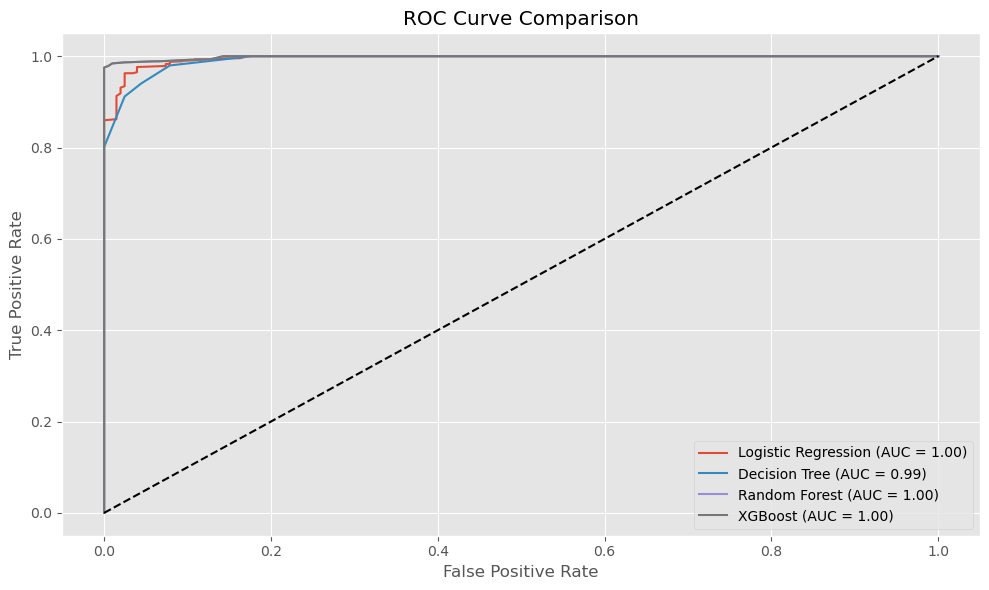

In [177]:
# Best model from grid search
import sklearn.metrics as metrics
best_xgb = grid_search.best_estimator_
xgb_pred = best_xgb.predict(X_test)
evaluate_model(y_test, xgb_pred, "XGBoost (Tuned)")
print("Best XGBoost Parameters:", grid_search.best_params_)
    
 # Plotting ROC Curve for all models
plt.figure(figsize=(10, 6))
for model, name in [(lr_model, 'Logistic Regression'), (dt_model, 'Decision Tree'), 
                    (rf_model, 'Random Forest'), (best_xgb, 'XGBoost')]:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve_comparison.png')
plt.show()